<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.6_n250.csv',
 'data_add_delta_-1.6_n120.csv',
 'data_add_delta_-1.6_n60.csv',
 'data_add_delta_-1.6_n30.csv',
 'data_add_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.364214,74.814884,26.039950,49.785951,0.006955,216.011954,216.009947,0.002007
1,0.0,1.0,57.092100,50.631689,20.964717,64.739903,-0.006144,203.422265,203.434374,-0.012109
2,0.0,2.0,85.822749,89.934028,87.131112,96.934220,0.003987,369.826097,369.818966,0.007131
3,0.0,3.0,95.961296,54.597571,58.984457,59.942272,-0.008683,279.476913,279.490009,-0.013096
4,0.0,4.0,34.600133,39.395267,23.367708,55.324622,0.034430,162.722160,162.689070,0.033090
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.603410,48.702408,97.858088,92.817402,-0.005733,277.975574,277.988000,-0.012425
249996,999.0,246.0,38.042105,87.196917,88.091113,95.997163,-0.055075,319.272223,319.325579,-0.053356
249997,999.0,247.0,75.749868,72.229426,64.992909,73.009228,-0.043905,295.937527,295.981184,-0.043656
249998,999.0,248.0,82.605072,66.615187,48.789778,42.873722,0.014009,250.897768,250.886879,0.010889


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.364214,74.814884,26.039950,49.785951,0.006955,216.011954,216.009947,0.002007
1,0.0,1.0,57.092100,50.631689,20.964717,64.739903,-0.006144,203.422265,203.434374,-0.012109
2,0.0,2.0,85.822749,89.934028,87.131112,96.934220,0.003987,369.826097,369.818966,0.007131
3,0.0,3.0,95.961296,54.597571,58.984457,59.942272,-0.008683,279.476913,279.490009,-0.013096
4,0.0,4.0,34.600133,39.395267,23.367708,55.324622,0.034430,162.722160,162.689070,0.033090
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.603410,48.702408,97.858088,92.817402,-0.005733,277.975574,277.988000,-0.012425
249996,999.0,246.0,38.042105,87.196917,88.091113,95.997163,-0.055075,319.272223,319.325579,-0.053356
249997,999.0,247.0,75.749868,72.229426,64.992909,73.009228,-0.043905,295.937527,295.981184,-0.043656
249998,999.0,248.0,82.605072,66.615187,48.789778,42.873722,0.014009,250.897768,250.886879,0.010889


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.364214,74.814884,26.039950,49.785951,0.006955,216.011954,216.009947,0.002007
1,0.0,1.0,57.092100,50.631689,20.964717,64.739903,-0.006144,203.422265,203.434374,-0.012109
2,0.0,2.0,85.822749,89.934028,87.131112,96.934220,0.003987,369.826097,369.818966,0.007131
3,0.0,3.0,95.961296,54.597571,58.984457,59.942272,-0.008683,279.476913,279.490009,-0.013096
4,0.0,4.0,34.600133,39.395267,23.367708,55.324622,0.034430,162.722160,162.689070,0.033090
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.603410,48.702408,97.858088,92.817402,-0.005733,277.975574,277.988000,-0.012425
249996,999.0,246.0,38.042105,87.196917,88.091113,95.997163,-0.055075,319.272223,319.325579,-0.053356
249997,999.0,247.0,75.749868,72.229426,64.992909,73.009228,-0.043905,295.937527,295.981184,-0.043656
249998,999.0,248.0,82.605072,66.615187,48.789778,42.873722,0.014009,250.897768,250.886879,0.010889


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

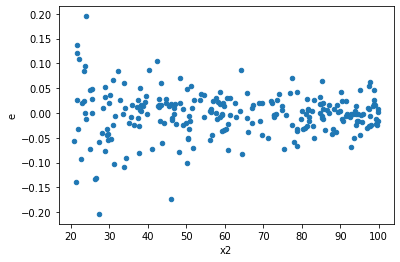

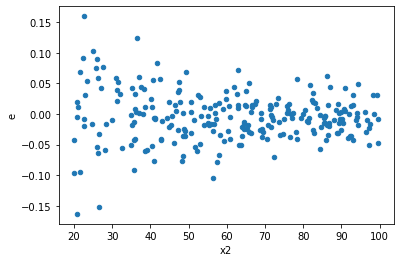

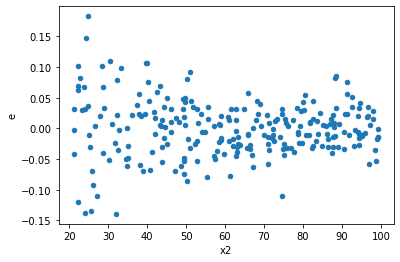

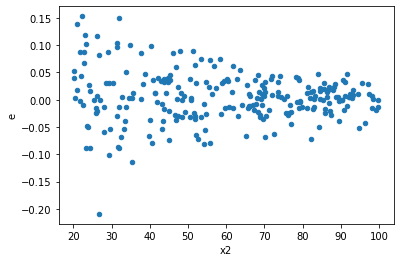

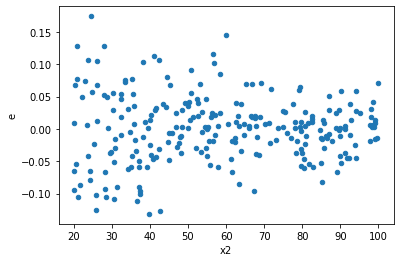

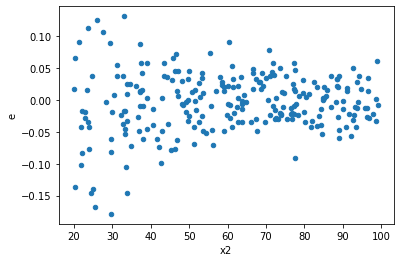

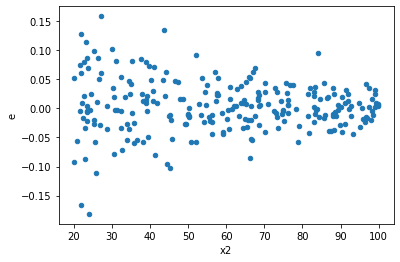

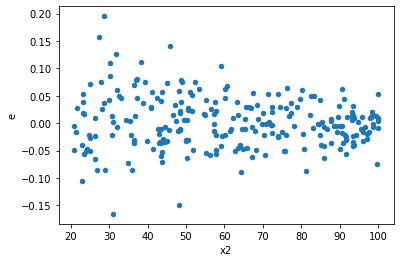

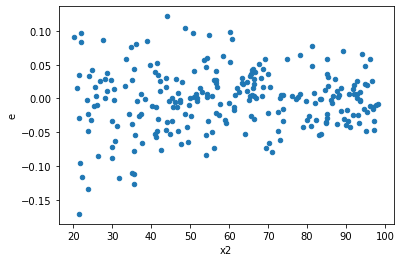

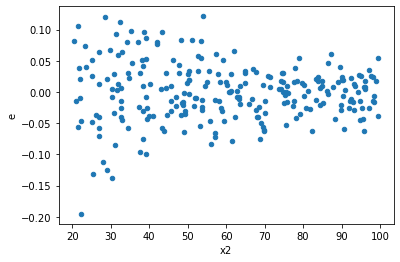

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
108.0,96.0,96.0,0.1769298060464423,0.1843531736665092,0.001843018812983774,0.0019203455590261374,1.0419565690255623,0.8408403897857819,0.579579805107109,0.42042019489289095,Reject005=1 : Homoscedasticity
169.0,96.0,96.0,0.19572907034998227,0.20490860156613588,0.0020388444828123155,0.002134464599647249,1.0468991713890008,0.8228044848846747,0.5885977575576626,0.41140224244233736,Reject005=1 : Homoscedasticity
181.0,96.0,96.0,0.16179544562956977,0.19381224761225627,0.0016853692253080185,0.002018877579294336,1.197884445128257,0.3779670715073209,0.8110164642463396,0.18898353575366045,Reject005=1 : Homoscedasticity
335.0,96.0,96.0,0.15950713753775303,0.1952111685487952,0.0016615326826849273,0.0020334496723832833,1.2238397075026912,0.3240584348490727,0.8379707825754636,0.16202921742453635,Reject005=1 : Homoscedasticity
578.0,96.0,96.0,0.16998198489834546,0.22579528493619475,0.001770645676024432,0.002352034218085362,1.3283483250959058,0.1660320105455957,0.9169839947272022,0.08301600527279784,Reject005=1 : Homoscedasticity
812.0,96.0,96.0,0.16978039766944647,0.21306354547796252,0.001768545809056734,0.0022194119320621095,1.2549360727307641,0.2676872963405903,0.8661563518297049,0.13384364817029515,Reject005=1 : Homoscedasticity
821.0,96.0,96.0,0.14218213810352315,0.16756971276145122,0.0014810639385783662,0.0017455178412651168,1.1785567089970423,0.4223717328708685,0.7888141335645658,0.21118586643543424,Reject005=1 : Homoscedasticity
914.0,96.0,96.0,0.1729275667079663,0.17582785291953207,0.001801328819874649,0.001831540134578459,1.0167716823105692,0.9352269622050735,0.5323865188974632,0.46761348110253675,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,0.28398984863488597,0.12521246948631315,0.002958227589946729,0.0013042965571490952,0.4409047368706958,7.889927534604043e-05,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,0.19340991581453626,0.0852466951631182,0.002014686623068086,0.0008879864079491479,0.4407565910160602,7.838117211402573e-05,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,0.23257319180961136,0.1857888335865348,0.0024226374146834517,0.0019353003498597376,0.798840279659682,0.2729588380586823,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,0.24795188393744927,0.12403398997405067,0.0025828321243484297,0.001292020728896361,0.500234109958772,0.0008030746124180908,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,0.29187879412961953,0.17870765370631908,0.00304040410551687,0.0018615380594408238,0.6122666576008855,0.01706526287389833,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,0.2761160499560142,0.15203472584264505,0.002876208853708481,0.001583695060860886,0.5506189367364356,0.0037972878383626205,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,0.2983260403085998,0.10529267706422939,0.0031075629198812483,0.0010967987194190562,0.3529449757564262,6.33986075826328e-07,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,0.2909326128624967,0.12179842418003571,0.0030305480506510074,0.0012687335852087052,0.41864823259811446,2.7863828380933633e-05,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,0.26822827549689254,0.15431640030243668,0.002794044536425964,0.001607462503150382,0.5753174232528832,0.007265797011067724,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    859
Reject005=1 : Homoscedasticity      141
Name: Result_test, dtype: int64